In [1]:
import numpy as np
from random import sample
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
class BayesianClassifier:

    '''
    Bayesian Clasifier
    
    ----------
    Paramaters
    ----------
    
    - x: data to be classified
    - clusters:
     
    ------
    Return
    ------
    Index which shows what cluster x belongs to
    '''
    
    def fit(self, data_X, data_y):
        '''
        Fit function. 
        ----------
        Paramaters
        ----------
        - data_X: Data Matrix training set.
        - data_y: Vector of classes. data_X[i,:] class is
            data_y[i].
        '''
        
        # Prepare data. We need data in clusters
        self.classes_set = list(set(data_y))
        clusters = [[] for i in self.classes_set]
        
        # If i-data has class j, introduces it in cluster j
        for i in range(0, len(data_y)):
            clusters[self.classes_set.index(data_y[i])].append(data_X[i])
        
        k = len(clusters)
        clusters = np.array([np.array(c) for c in clusters])
        
        d = len(data_X[0]) #Dimensions
        
        self.meanCluster = []
        covarianceCluster = []
        N = len(data_X)
        sizeCluster = [len(clusters[i])for i in range (0, k)]
        
        for i in range (0, k):

            #Compute mean of cluster
            self.meanCluster.append([np.average([clusters[i][:,j]]) for j in range(0, d)])

            #Compute the stimated covariance matrix of cluster
            aux = np.zeros((d,d))
            for j in range (0, len(clusters[i])):
                nDisper = np.subtract(clusters[i][j], self.meanCluster[i])
                product = np.outer(nDisper,nDisper)
                aux = aux + product
            aux = aux / sizeCluster[i]
            covarianceCluster.append(aux)
            
        self.inverse = [np.linalg.inv(i) for i in covarianceCluster]
        self.compute = [np.log(np.linalg.norm(covarianceCluster[i]) -2*np.log(sizeCluster[i]/N)) for i in range(0, k)]
        
        
    def predict(self, test_X):
        '''
        Predict function.
        ----------
        Paramaters
        ----------
        - test_X: Data Matrix. Function will predict the
            class for each data test_X[i,:].
        ------
        Return
        ------
        - test_y: Vector of classes. test_X[i,:] class is
            test_y[i].
        '''
        test_y = []
        
        for x in X_test:
            solutions = []
            #Compute the goal function for the cluster. 
            #We will compute the function in multiple steps

            #First we find the distance between point x and cluster's mean
            distances = [np.subtract(x, i) for i in self.meanCluster]
            
            solutions = [np.dot(np.dot(distances[i], self.inverse[i]), distances[i]) for i in range(0, len(distances))]
           
            solutions = [solutions[i] + self.compute[i] for i in range(0, len(solutions))]

            test_y.append(self.classes_set[solutions.index(min(solutions))])
        return np.array(test_y)

In [53]:
def clusterPlot(clusters, x, y):
    '''
    Draw all members of a cluster list and centroids
    
    ----------
    Paramaters
    ----------
    
    - clusters: Clusters list and each cluster is a data Matrix of points
    - x: coordinate x in graphic.
    - y: coordinate y in graphic.
    '''
    for cluster in clusters:
        plt.plot(cluster[:,x], cluster[:,y], 'o')
    plt.show()

Accuracy:  95.92 %


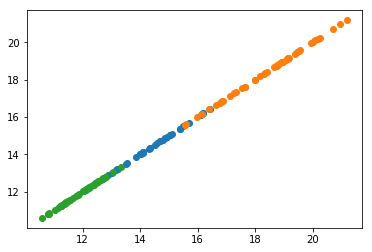

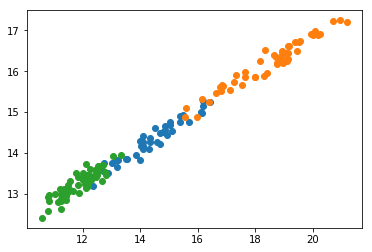

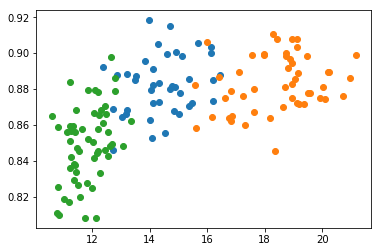

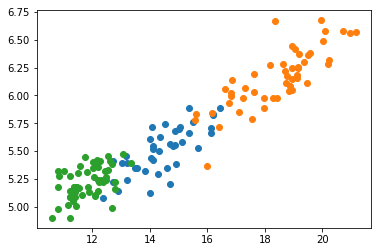

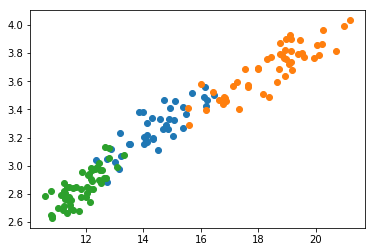

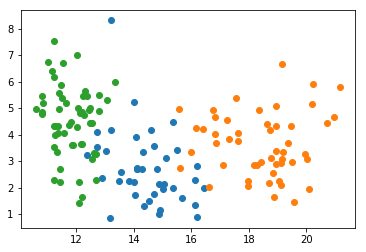

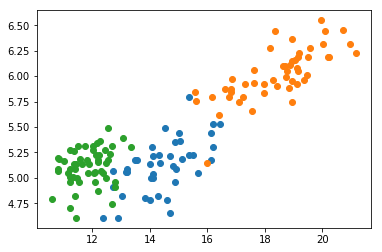

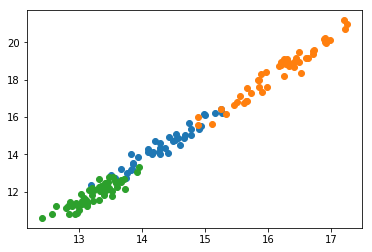

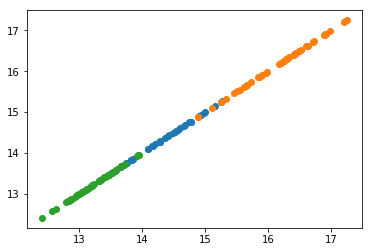

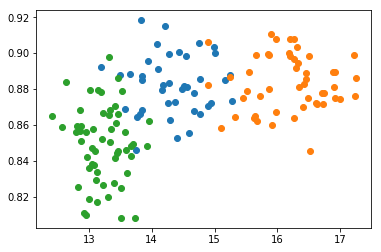

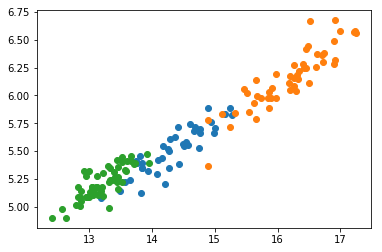

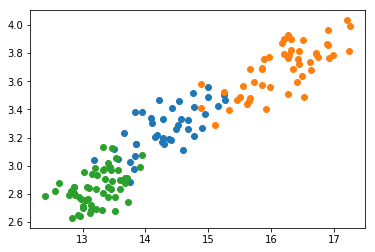

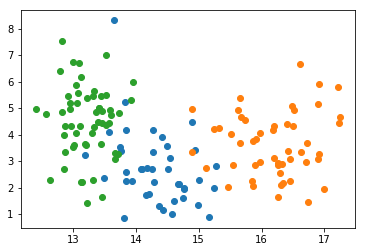

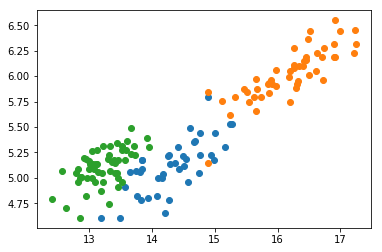

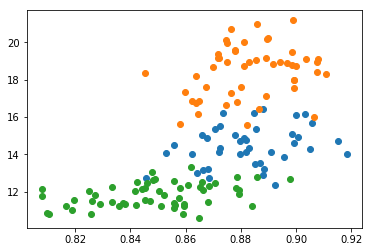

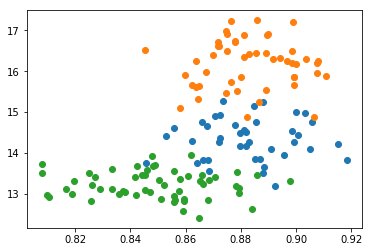

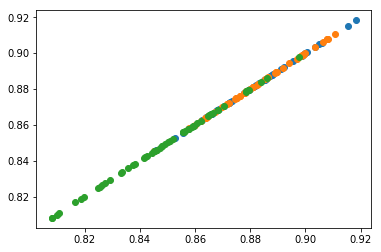

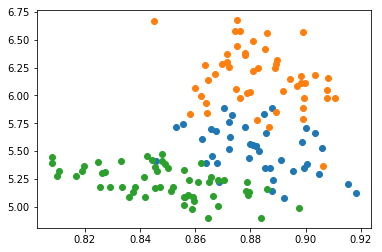

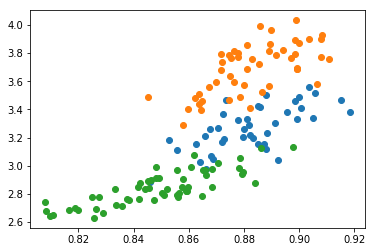

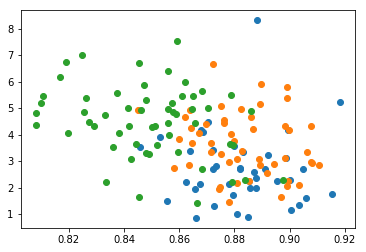

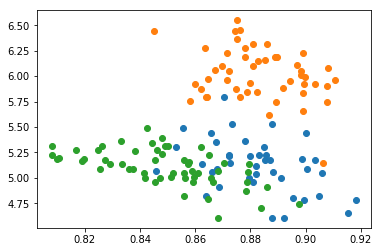

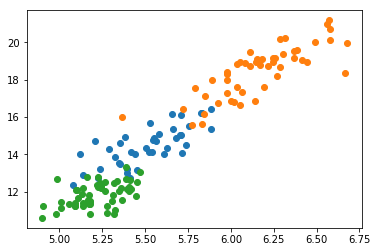

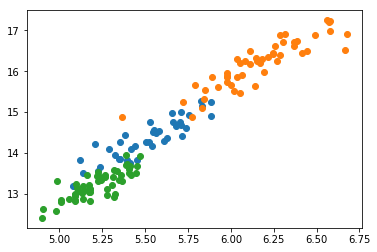

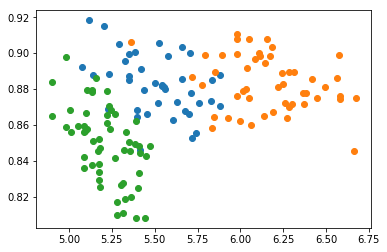

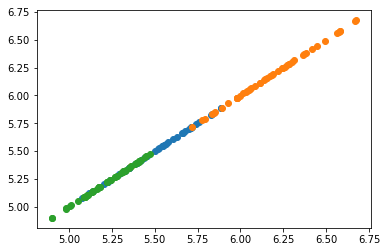

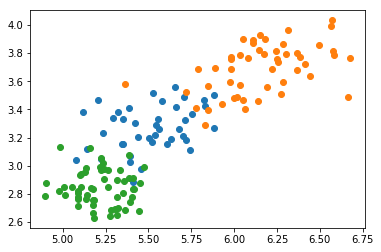

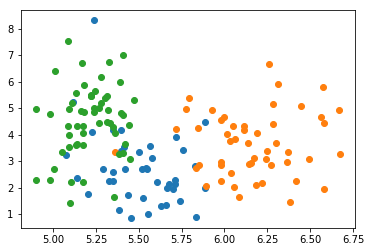

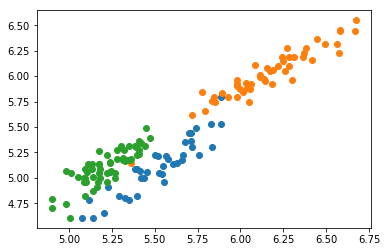

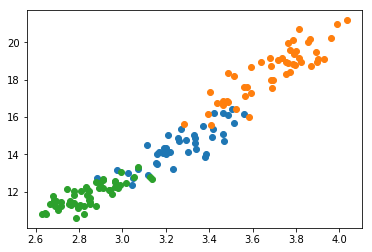

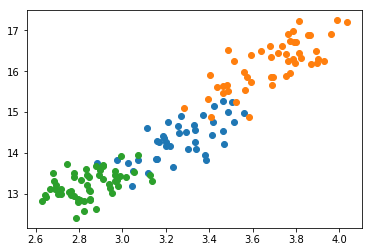

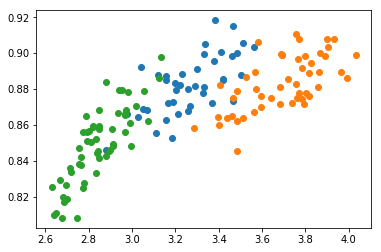

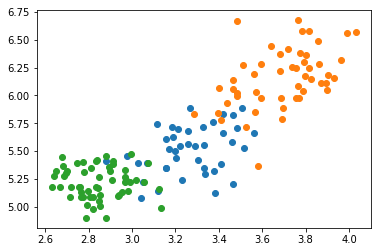

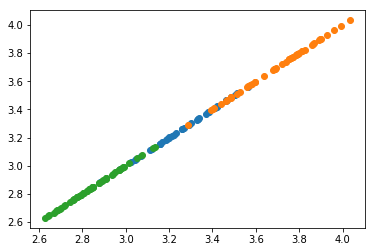

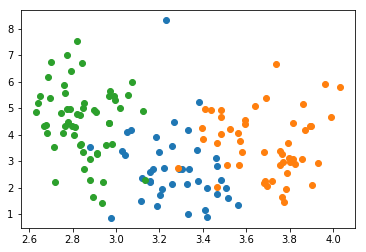

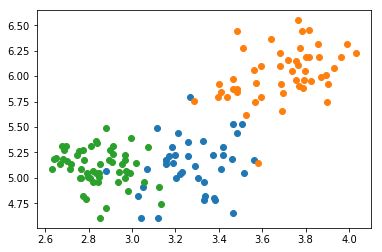

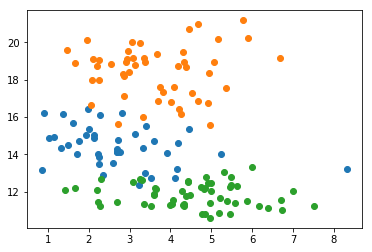

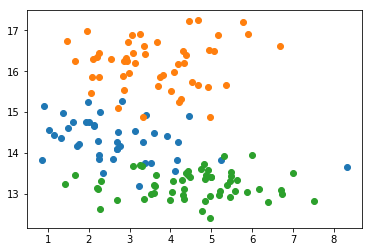

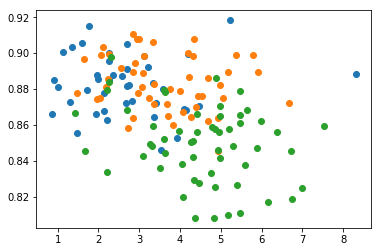

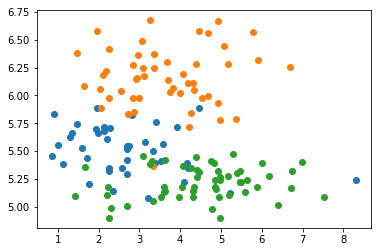

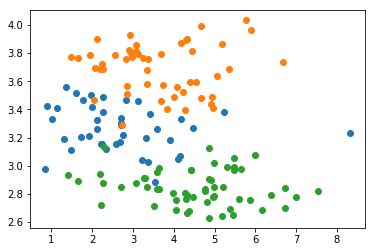

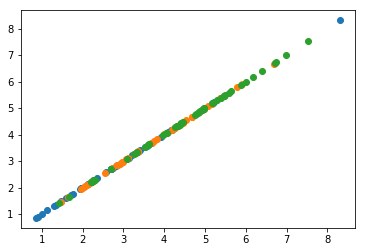

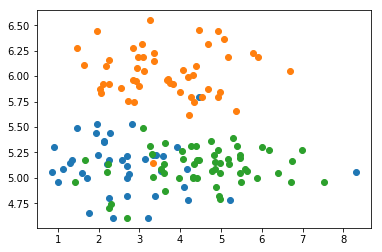

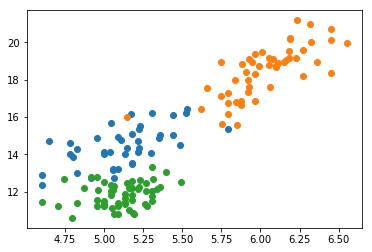

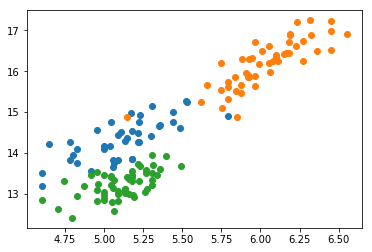

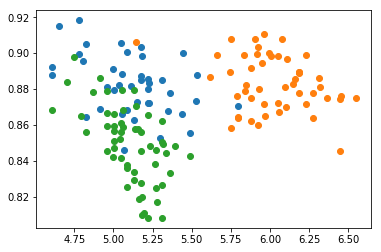

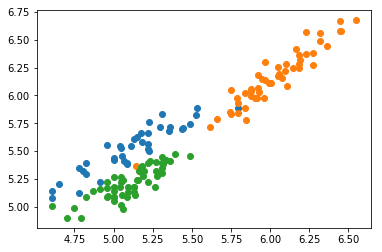

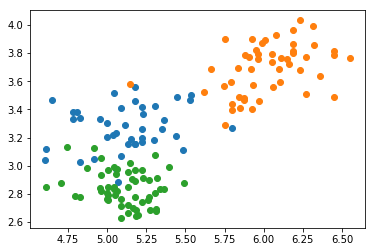

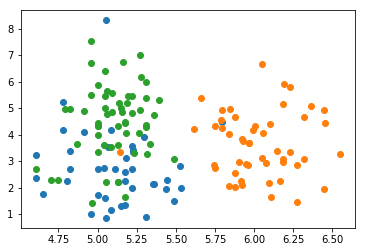

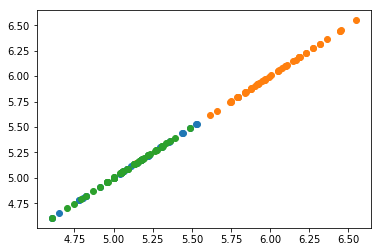

In [55]:
data = pd.read_csv('seeds_dataset.txt')
data = data.values
X = data[:,:-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

model = BayesianClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: ', np.round(np.mean(y_pred == y_test) * 100, 2),'%')

classes_set = list(set(y_pred))
clusters = [[] for i in classes_set]

# If i-data has class j, introduces it in cluster j
for i in range(0, len(y_pred)):
    clusters[classes_set.index(y_pred[i])].append(X_test[i])

clusters = np.array([np.array(c) for c in clusters])

for i in range (0,7):
    for j in range (0,7):
        clusterPlot(clusters,i,j)